In [ ]:
from torchvision import datasets, transforms

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转成Tensor
    transforms.Normalize((0.1307,), (0.3081,))  # 标准化
])

# 下载训练集和测试集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [2]:
import torch
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# 关键：使用Windows自带的中文字体（确保存在）
# ----------------------------
plt.rcParams["font.family"] = ["SimSun", "SimHei", "Microsoft YaHei"]  # 宋体、黑体、微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 为了可视化，取部分数据（比如前10000个样本）
subset_size = 60000
train_subset = torch.utils.data.Subset(train_dataset, range(subset_size))
train_loader = DataLoader(train_subset, batch_size=subset_size, shuffle=False)

# ======================
# 2. 数据展开为向量
# ======================
images, labels = next(iter(train_loader))
X = images.view(subset_size, -1).numpy()  # 展平为 (N, 784)
y = labels.numpy()

# ======================
# 3. PCA降维
# ======================
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)


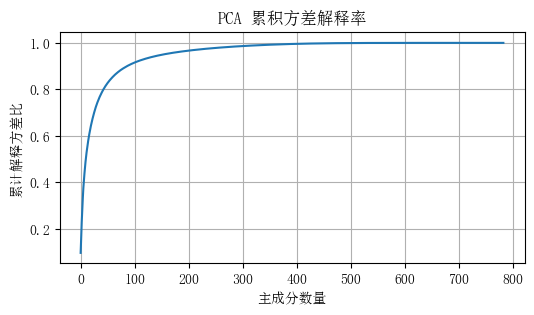

In [3]:
# ======================
# 4. 可视化
# ======================

# (1) 解释方差比
plt.figure(figsize=(6, 3))
plt.plot(np.cumsum(PCA().fit(X).explained_variance_ratio_))
plt.xlabel("主成分数量")
plt.ylabel("累计解释方差比")
plt.title("PCA 累积方差解释率")
plt.grid(True)
plt.show()

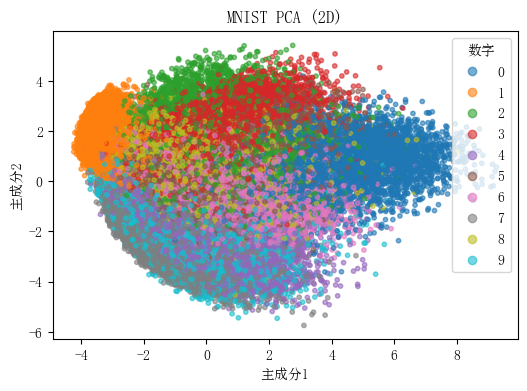

In [4]:
# (2) PCA 2D 可视化
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', alpha=0.6, s=10)
plt.legend(*scatter.legend_elements(), title="数字")
plt.title("MNIST PCA (2D)")
plt.xlabel("主成分1")
plt.ylabel("主成分2")
plt.show()


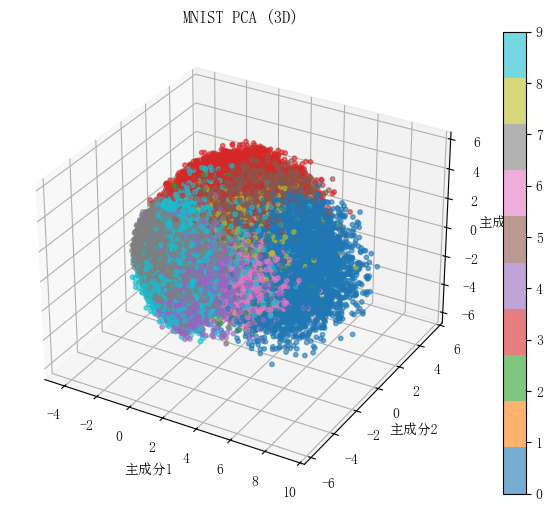

: 

In [ ]:
# (3) PCA 3D 可视化
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='tab10', alpha=0.6, s=10)
fig.colorbar(p)
ax.set_title("MNIST PCA (3D)")
ax.set_xlabel("主成分1")
ax.set_ylabel("主成分2")
ax.set_zlabel("主成分3")
plt.show()